# Data Analyst Job Analysis

In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

In [3]:
# Load Data

df = pd.read_csv('Data/gsearch_jobs.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'index', 'title', 'company_name', 'location', 'via',
       'description', 'extensions', 'job_id', 'thumbnail', 'posted_at',
       'schedule_type', 'work_from_home', 'salary', 'search_term', 'date_time',
       'search_location', 'commute_time', 'salary_pay', 'salary_rate',
       'salary_avg', 'salary_min', 'salary_max', 'salary_hourly',
       'salary_yearly', 'salary_standardized', 'description_tokens'],
      dtype='object')

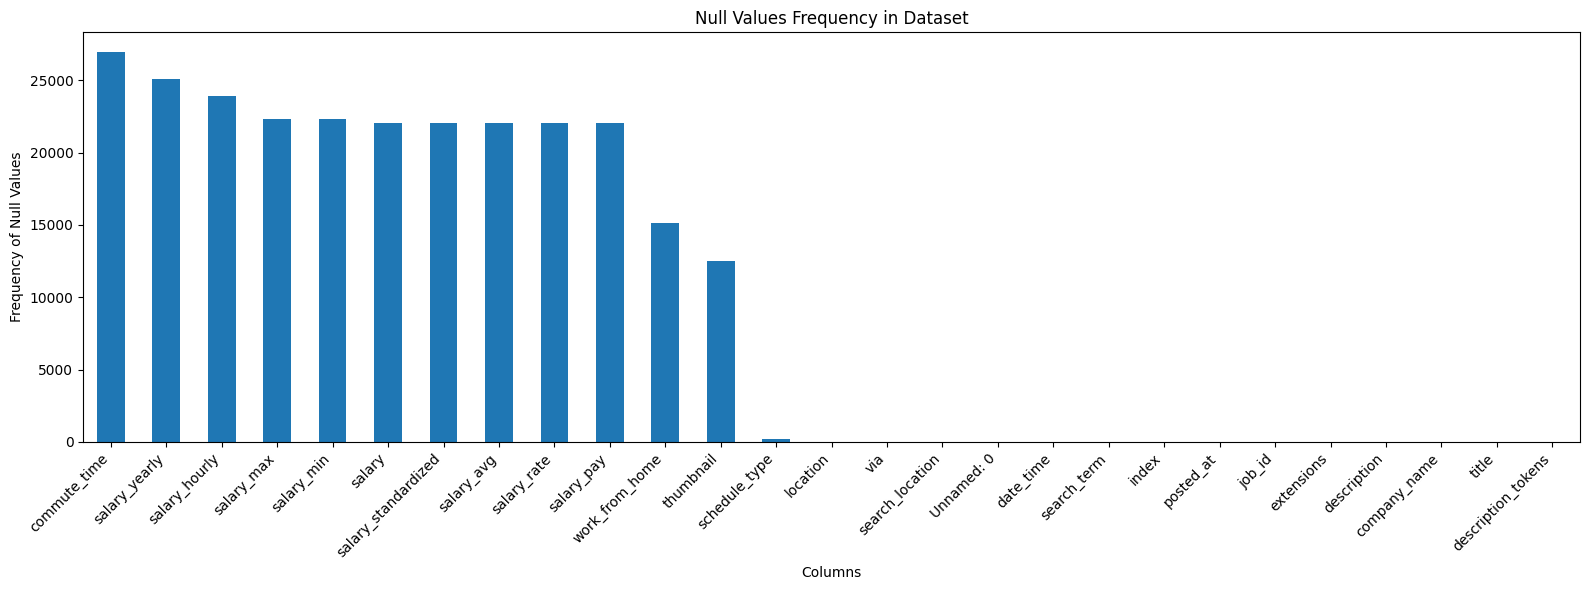

In [5]:
# Missing Values

null_counts = df.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(16,6))
null_counts.plot(kind='bar')
plt.title("Null Values Frequency in Dataset")
plt.xlabel('Columns')
plt.ylabel('Frequency of Null Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [6]:
# Drop Columns with only Null values and zero usage

df= df.drop(columns=['commute_time','Unnamed: 0','index','thumbnail','job_id','search_location'],axis=1)

In [7]:
# Change The DateTime Column from Object to DateTime type

df['date_time'] = pd.to_datetime(df['date_time'])

## Exploratory Data Analysis

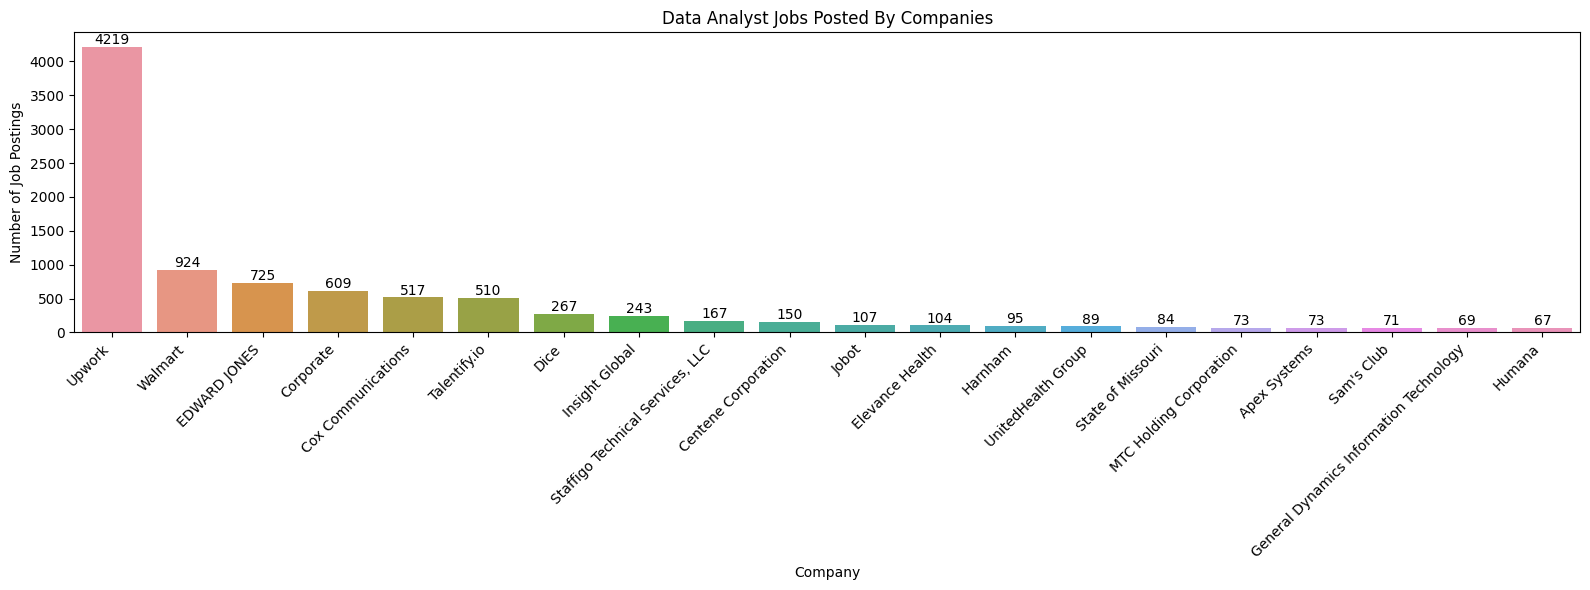

In [8]:
# Which companies are actively hiring for Data Analyst positions? (Top 20)

companies = df['company_name'].value_counts().reset_index(name = 'Frequency').head(20)

# Plot the companies
plt.figure(figsize=(16,6))
ax=sns.barplot(x='company_name',y='Frequency',data=companies)
plt.title("Data Analyst Jobs Posted By Companies")
plt.xlabel("Company")
plt.ylabel("Number of Job Postings")
plt.xticks(rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

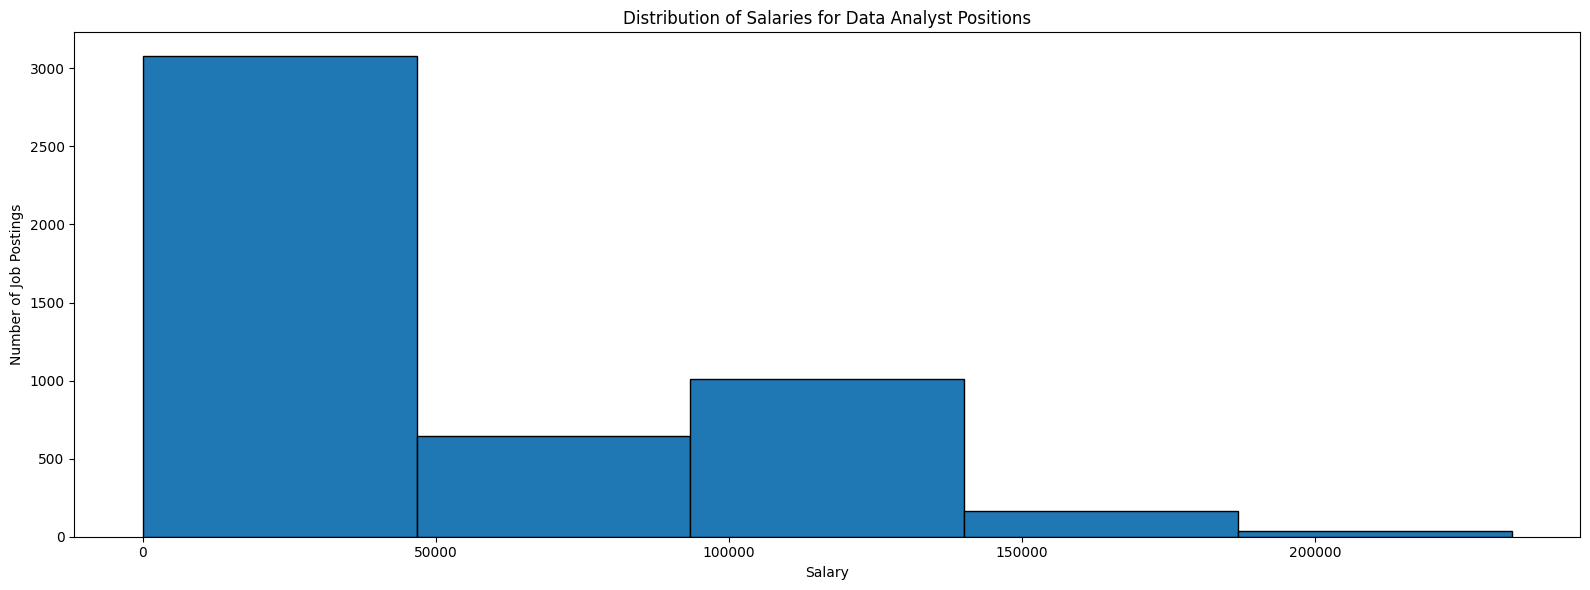

In [9]:
# What is the distribution of salaries for Data Analyst positions?

plt.figure(figsize=(16,6))
df['salary_avg'].plot(kind='hist',bins=5,edgecolor='black')
plt.title('Distribution of Salaries for Data Analyst Positions')
plt.xlabel('Salary')
plt.ylabel('Number of Job Postings')
plt.tight_layout()
plt.show()

In [18]:
# Is there a correlation between work schedule type (full-time/part-time) and salary for Data Analyst roles?
df['schedule_type'].value_counts()


schedule_type
Full-time     19998
Contractor     6370
Part-time       275
Internship      149
Name: count, dtype: int64

In [14]:
# How does remote work availability affect Data Analyst job salaries?

df['work_from_home'].fillna(False,inplace=True)
df['work_from_home'].value_counts()

work_from_home
False    15123
True     11843
Name: count, dtype: int64

In [17]:
df[df['work_from_home']==True].isna().sum()

title                      0
company_name               0
location                   0
via                        0
description                0
extensions                 0
posted_at                  0
schedule_type             40
work_from_home             0
salary                  8469
search_term                0
date_time                  0
salary_pay              8469
salary_rate             8469
salary_avg              8469
salary_min              8608
salary_max              8608
salary_hourly           9176
salary_yearly          11142
salary_standardized     8469
description_tokens         0
dtype: int64

In [ ]:
# What are the most common job locations for Data Analyst positions?

